In [40]:
import torch
import torchvision

batch_size_train=128

ds=torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
train_loader = torch.utils.data.DataLoader(ds,batch_size=batch_size_train, shuffle=True,num_workers=1)

data shape torch.Size([128, 1, 28, 28])


C:\Users\mxa574\AppData\Local\Continuum\anaconda3\envs\maskrcnn_venv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


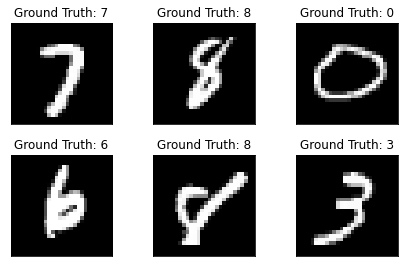

In [41]:
example_data, example_targets = next(iter(train_loader))
print("data shape",example_data.shape)
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig.show()

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import utils
from torchvision import transforms
import torchvision.utils as vutils
import numpy as np

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 30))
    return n

def log_images(images, num_images, format='NCHW', normalize=True):
    '''
    input images are expected in format (NCHW)
    '''
    if type(images) == np.ndarray:
        images = torch.from_numpy(images)

    if format == 'NHWC':
        images = images.transpose(1, 3)

    

    # Make horizontal grid from image tensor
    horizontal_grid = vutils.make_grid(
        images, normalize=normalize, scale_each=True)
    # Make vertical grid from image tensor
    nrows = int(np.sqrt(num_images))
    grid = vutils.make_grid(
        images, nrow=nrows, normalize=True, scale_each=True)

    
    fig = plt.figure(figsize=(16, 16))
    plt.imshow(np.moveaxis(horizontal_grid.numpy(), 0, -1))
    plt.axis('off')
    #if plot_horizontal:
    #    display.display(plt.gcf())
    plt.show()


In [38]:

class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """

    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 1*28*28
        n_out = 1

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
         )
        self.hidden2 = nn.Sequential(
             nn.Linear(256, 128),
             nn.ReLU(),
             nn.Dropout(0.3)
         )
        self.out = nn.Sequential(
            torch.nn.Linear(128, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x


class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """

    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 30
        n_out = 1*28*28

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 128),
            nn.ReLU()
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU()
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU()
       )

        self.out = nn.Sequential(
            nn.Linear(512, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

Epoch: [0/50], Batch Num: [468/469]
Discriminator Loss: 0.0338, Generator Loss: 3.8429
D(x): 0.9999, D(G(z)): 0.0330
------------------------------
0  of  50  epochs of Training finished


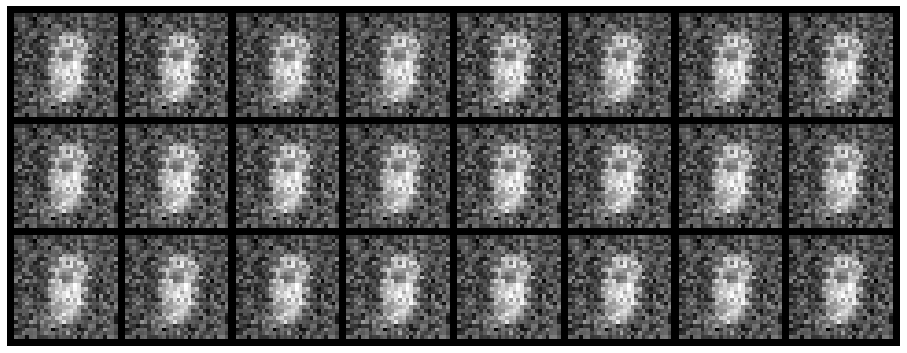

Epoch: [1/50], Batch Num: [468/469]
Discriminator Loss: 0.0181, Generator Loss: 5.4247
D(x): 0.9999, D(G(z)): 0.0175
------------------------------
1  of  50  epochs of Training finished


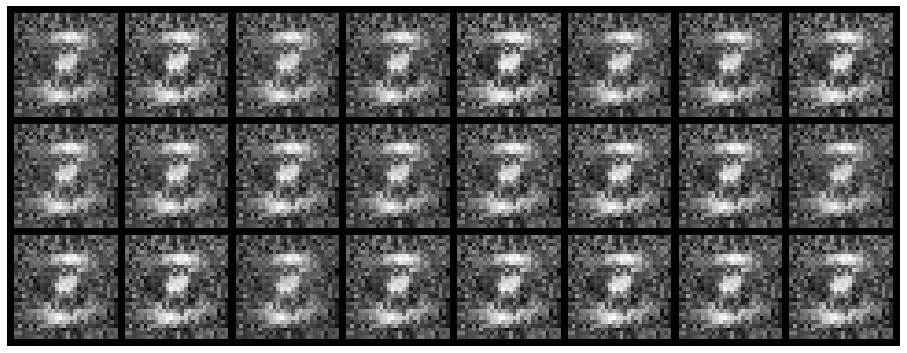

Epoch: [2/50], Batch Num: [468/469]
Discriminator Loss: 0.0134, Generator Loss: 8.5496
D(x): 0.9964, D(G(z)): 0.0070
------------------------------
2  of  50  epochs of Training finished


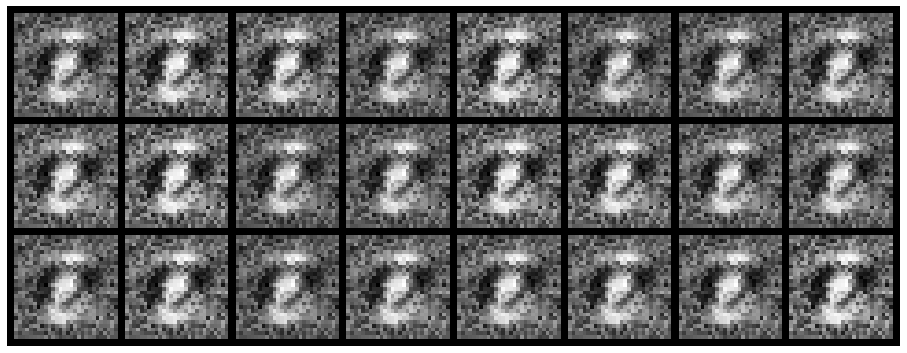

Epoch: [3/50], Batch Num: [468/469]
Discriminator Loss: 0.0512, Generator Loss: 7.9125
D(x): 0.9890, D(G(z)): 0.0143
------------------------------
3  of  50  epochs of Training finished


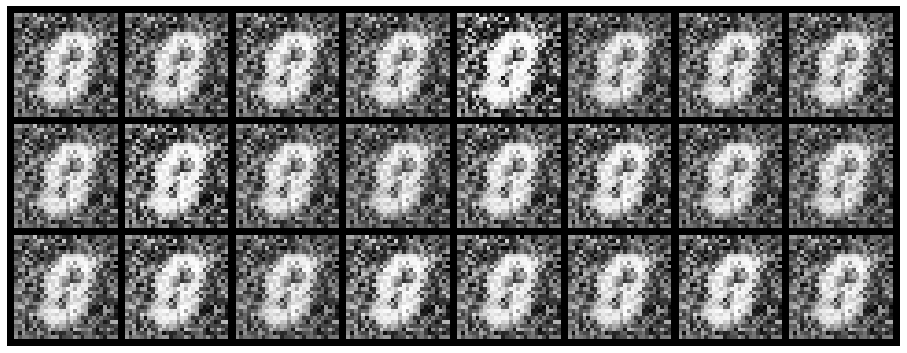

Epoch: [4/50], Batch Num: [468/469]
Discriminator Loss: 0.0057, Generator Loss: 7.5309
D(x): 1.0000, D(G(z)): 0.0056
------------------------------
4  of  50  epochs of Training finished


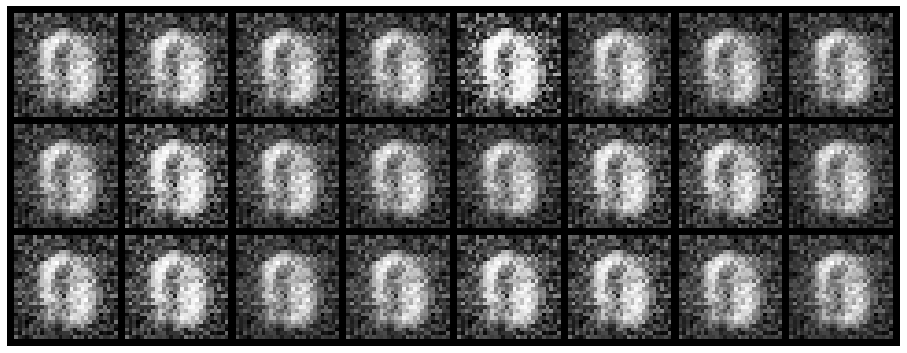

Epoch: [5/50], Batch Num: [468/469]
Discriminator Loss: 0.0155, Generator Loss: 8.4050
D(x): 0.9910, D(G(z)): 0.0005
------------------------------
5  of  50  epochs of Training finished


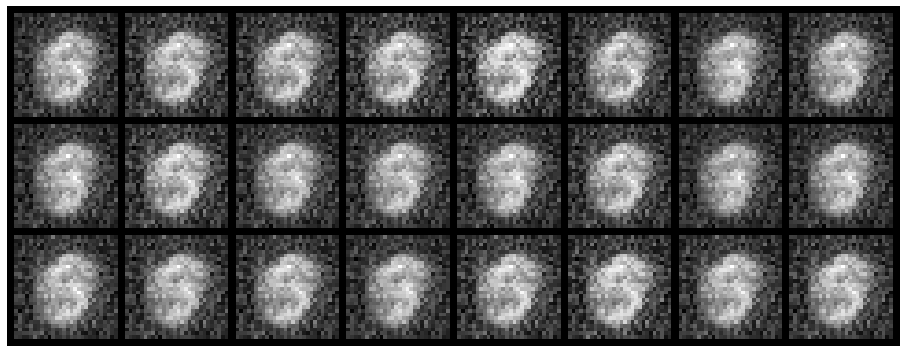

Epoch: [6/50], Batch Num: [468/469]
Discriminator Loss: 0.0064, Generator Loss: 9.0169
D(x): 0.9975, D(G(z)): 0.0034
------------------------------
6  of  50  epochs of Training finished


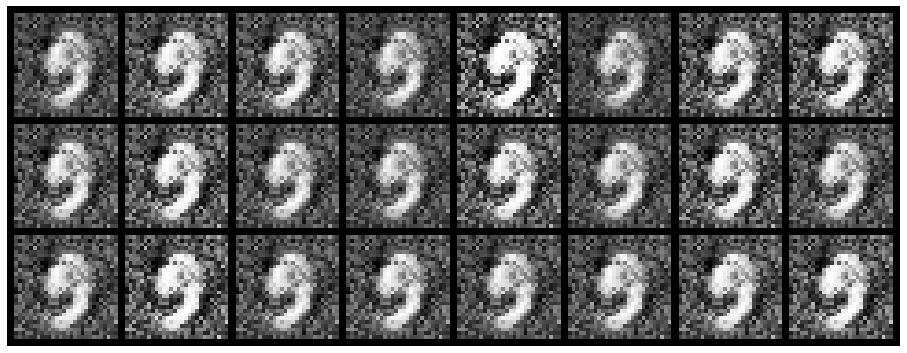

Epoch: [7/50], Batch Num: [468/469]
Discriminator Loss: 0.0007, Generator Loss: 9.8981
D(x): 0.9999, D(G(z)): 0.0005
------------------------------
7  of  50  epochs of Training finished


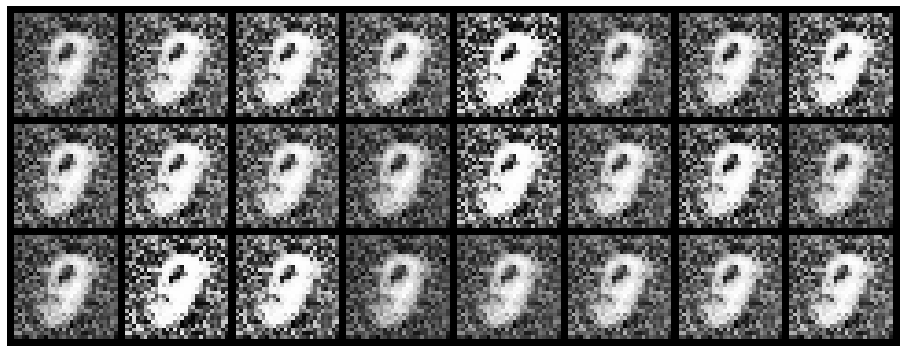

Epoch: [8/50], Batch Num: [468/469]
Discriminator Loss: 0.0037, Generator Loss: 7.2115
D(x): 0.9992, D(G(z)): 0.0028
------------------------------
8  of  50  epochs of Training finished


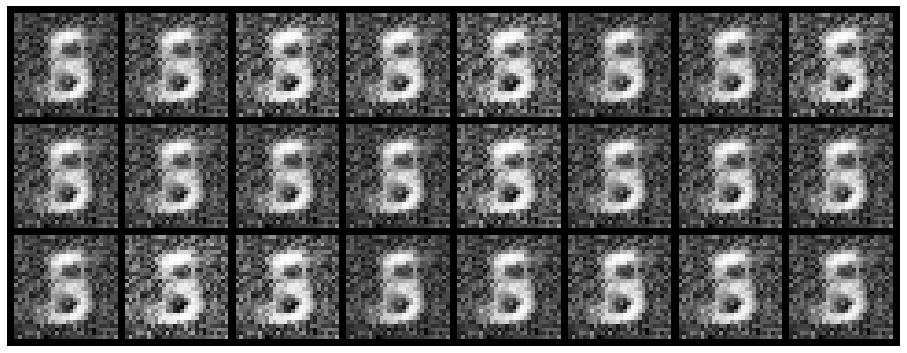

Epoch: [9/50], Batch Num: [468/469]
Discriminator Loss: 0.0084, Generator Loss: 8.9205
D(x): 1.0000, D(G(z)): 0.0064
------------------------------
9  of  50  epochs of Training finished


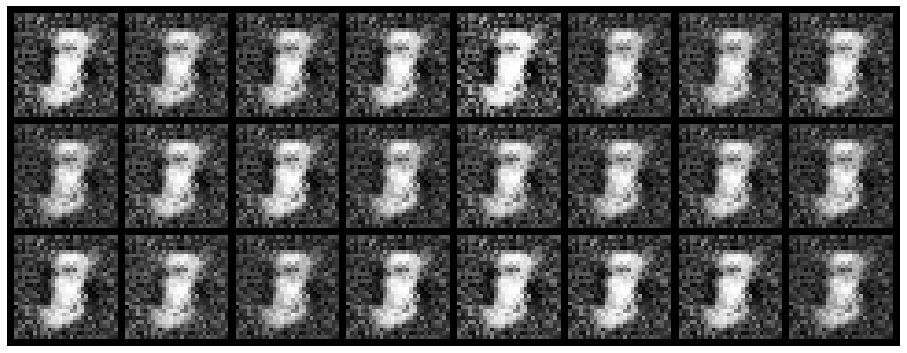

Epoch: [10/50], Batch Num: [468/469]
Discriminator Loss: 0.0018, Generator Loss: 9.9757
D(x): 0.9995, D(G(z)): 0.0013
------------------------------
10  of  50  epochs of Training finished


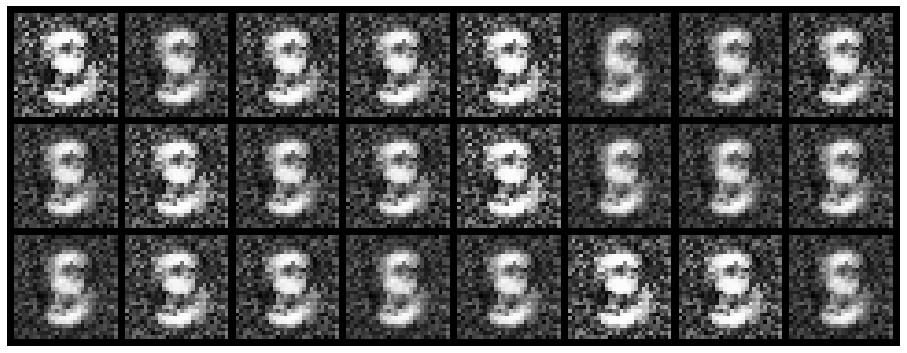

Epoch: [11/50], Batch Num: [468/469]
Discriminator Loss: 0.0006, Generator Loss: 9.1880
D(x): 0.9997, D(G(z)): 0.0003
------------------------------
11  of  50  epochs of Training finished


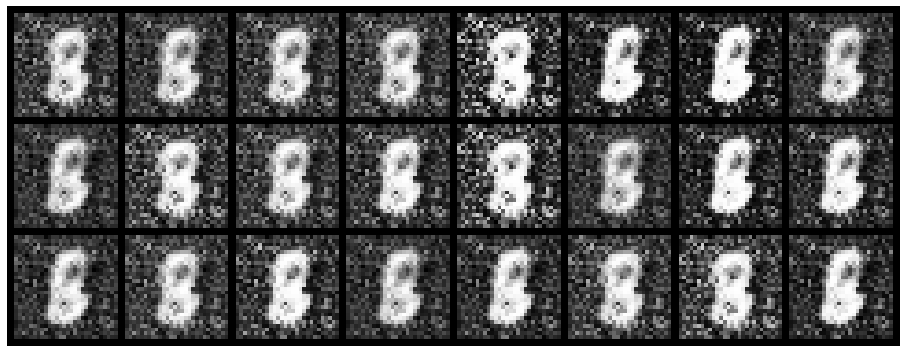

Epoch: [12/50], Batch Num: [468/469]
Discriminator Loss: 0.0325, Generator Loss: 8.3720
D(x): 0.9914, D(G(z)): 0.0094
------------------------------
12  of  50  epochs of Training finished


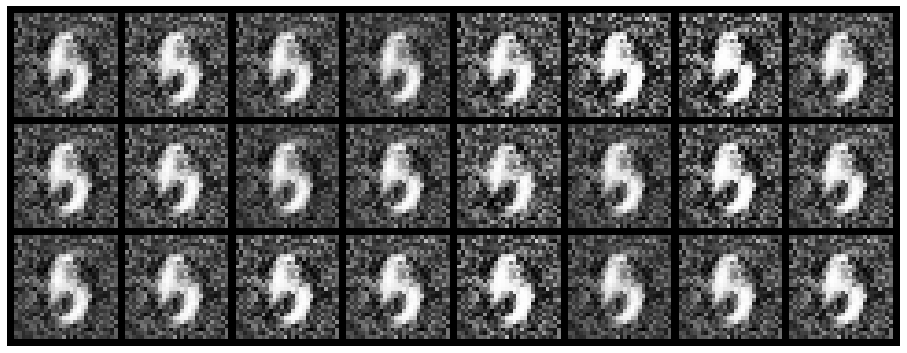

Epoch: [13/50], Batch Num: [468/469]
Discriminator Loss: 0.0094, Generator Loss: 8.2895
D(x): 0.9937, D(G(z)): 0.0010
------------------------------
13  of  50  epochs of Training finished


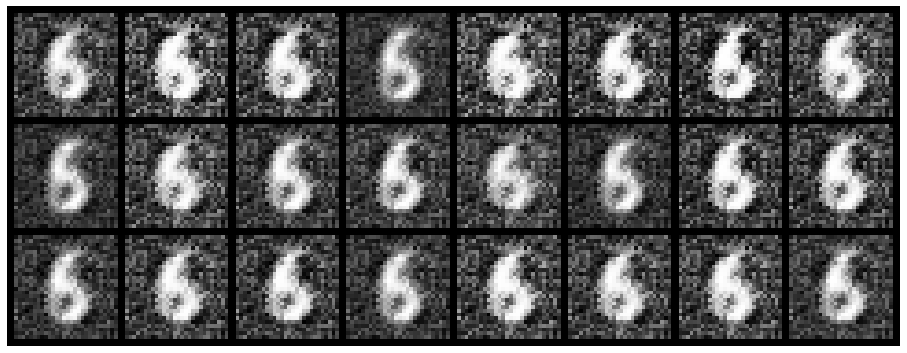

Epoch: [14/50], Batch Num: [468/469]
Discriminator Loss: 0.0026, Generator Loss: 12.2797
D(x): 0.9997, D(G(z)): 0.0022
------------------------------
14  of  50  epochs of Training finished


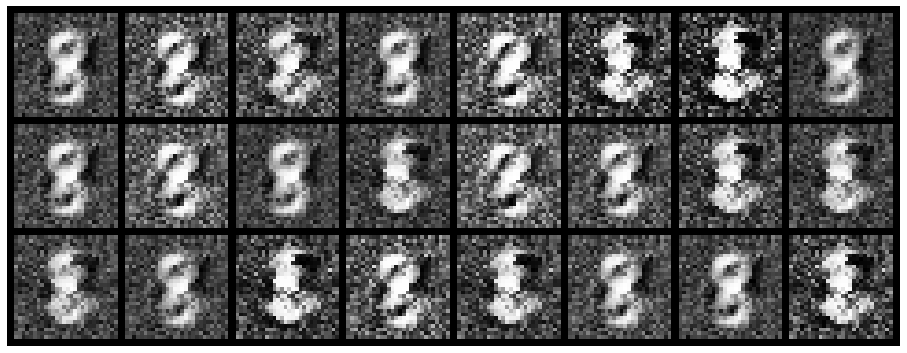

Epoch: [15/50], Batch Num: [468/469]
Discriminator Loss: 0.0001, Generator Loss: 11.3407
D(x): 1.0000, D(G(z)): 0.0000
------------------------------
15  of  50  epochs of Training finished


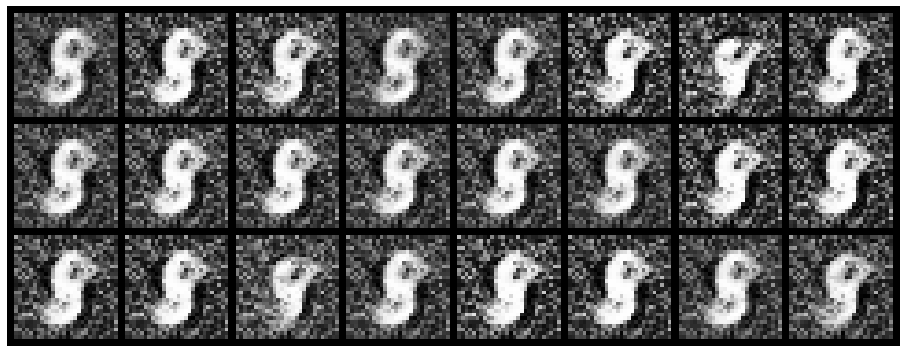

Epoch: [16/50], Batch Num: [468/469]
Discriminator Loss: 0.0018, Generator Loss: 9.3472
D(x): 0.9992, D(G(z)): 0.0009
------------------------------
16  of  50  epochs of Training finished


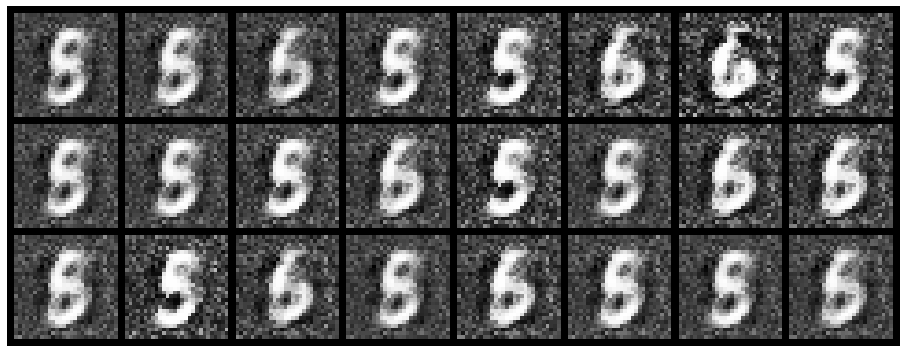

Epoch: [17/50], Batch Num: [468/469]
Discriminator Loss: 0.0009, Generator Loss: 10.3003
D(x): 1.0000, D(G(z)): 0.0009
------------------------------
17  of  50  epochs of Training finished


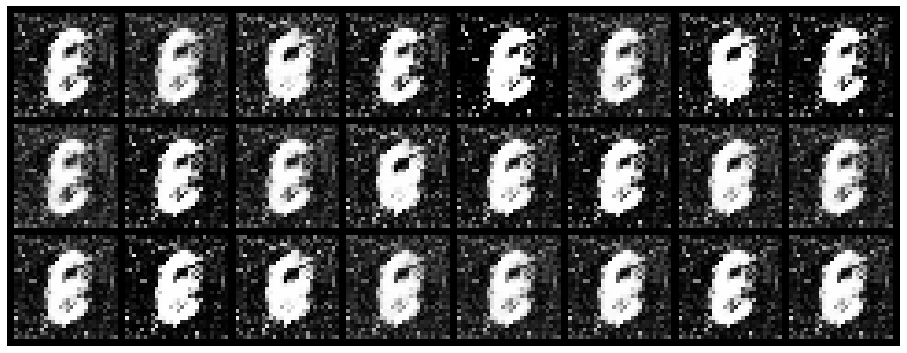

Epoch: [18/50], Batch Num: [468/469]
Discriminator Loss: 0.0020, Generator Loss: 8.2858
D(x): 1.0000, D(G(z)): 0.0019
------------------------------
18  of  50  epochs of Training finished


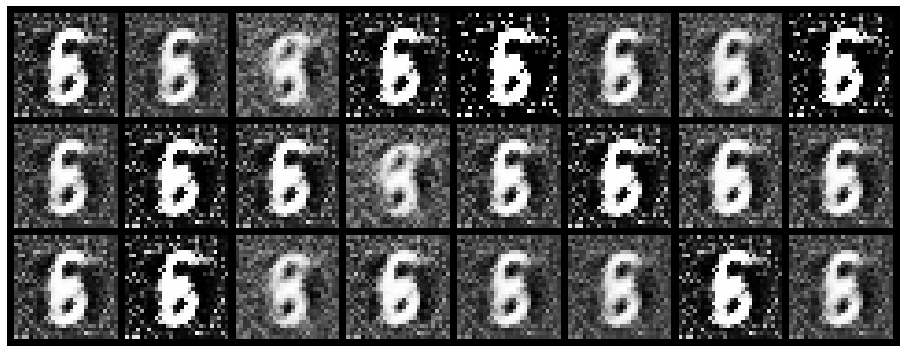

Epoch: [19/50], Batch Num: [468/469]
Discriminator Loss: 0.0001, Generator Loss: 12.6978
D(x): 1.0000, D(G(z)): 0.0001
------------------------------
19  of  50  epochs of Training finished


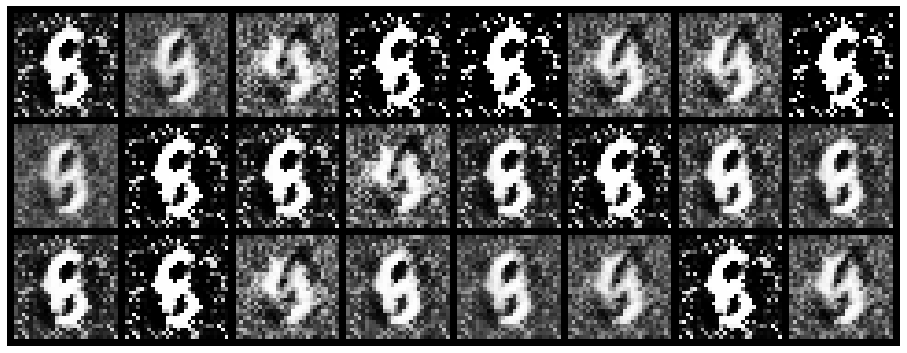

Epoch: [20/50], Batch Num: [468/469]
Discriminator Loss: 0.0003, Generator Loss: 15.6879
D(x): 0.9998, D(G(z)): 0.0001
------------------------------
20  of  50  epochs of Training finished


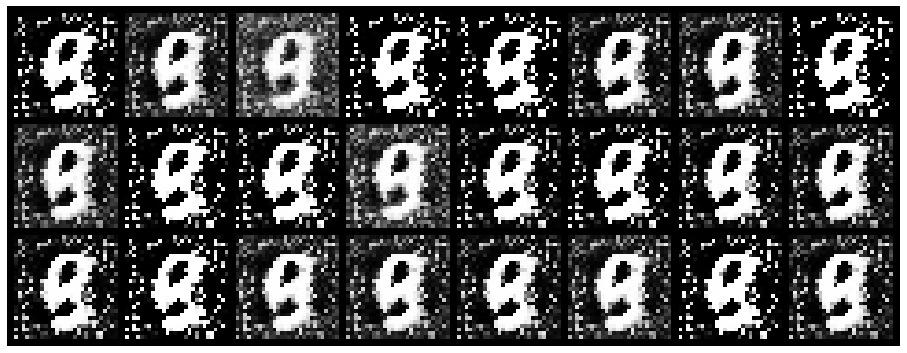

Epoch: [21/50], Batch Num: [468/469]
Discriminator Loss: 0.0000, Generator Loss: 44.0441
D(x): 1.0000, D(G(z)): 0.0000
------------------------------
21  of  50  epochs of Training finished


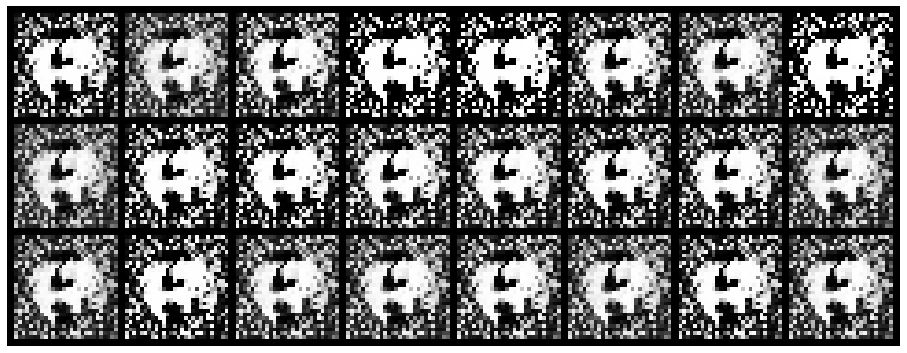

Epoch: [22/50], Batch Num: [468/469]
Discriminator Loss: 0.0147, Generator Loss: 13.4670
D(x): 1.0000, D(G(z)): 0.0107
------------------------------
22  of  50  epochs of Training finished


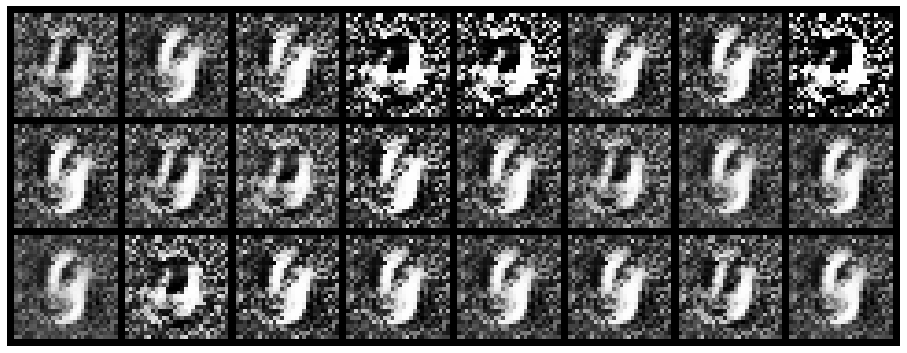

Epoch: [23/50], Batch Num: [468/469]
Discriminator Loss: 0.0001, Generator Loss: 23.3200
D(x): 0.9999, D(G(z)): 0.0001
------------------------------
23  of  50  epochs of Training finished


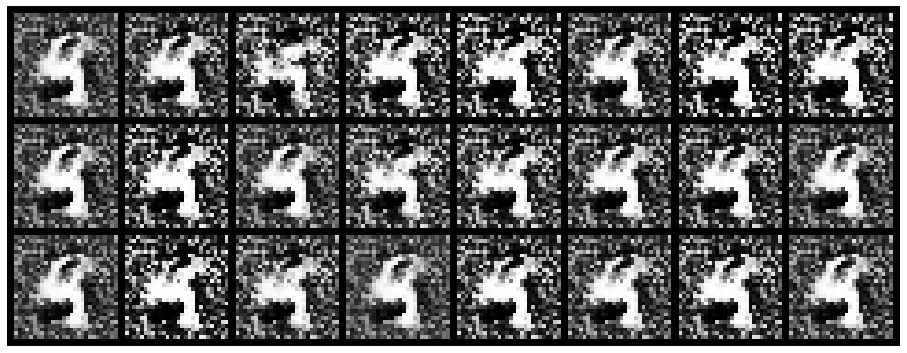

Epoch: [24/50], Batch Num: [468/469]
Discriminator Loss: 0.0209, Generator Loss: 11.9486
D(x): 1.0000, D(G(z)): 0.0093
------------------------------
24  of  50  epochs of Training finished


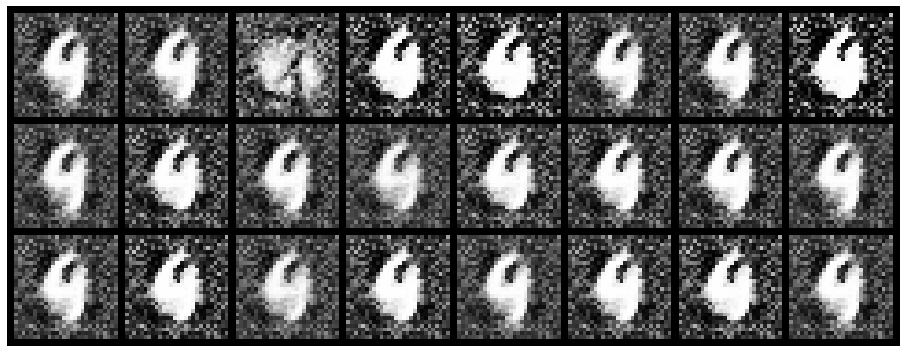

Epoch: [25/50], Batch Num: [468/469]
Discriminator Loss: 0.0121, Generator Loss: 14.2642
D(x): 0.9920, D(G(z)): 0.0001
------------------------------
25  of  50  epochs of Training finished


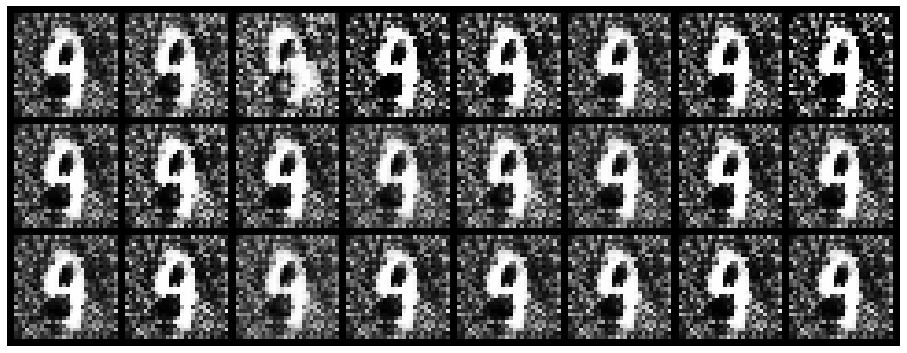

Epoch: [26/50], Batch Num: [468/469]
Discriminator Loss: 0.0029, Generator Loss: 8.9909
D(x): 1.0000, D(G(z)): 0.0028
------------------------------
26  of  50  epochs of Training finished


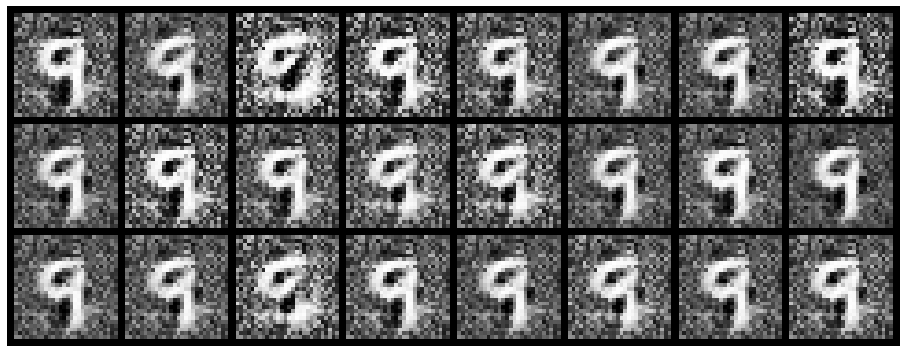

Epoch: [27/50], Batch Num: [468/469]
Discriminator Loss: 0.0035, Generator Loss: 8.3269
D(x): 1.0000, D(G(z)): 0.0034
------------------------------
27  of  50  epochs of Training finished


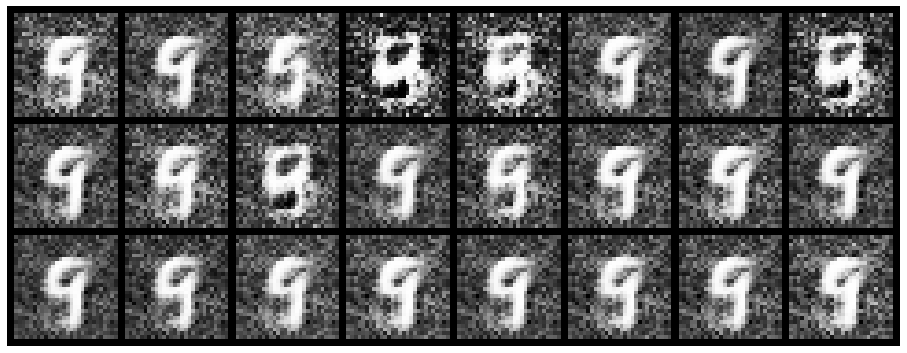

Epoch: [28/50], Batch Num: [468/469]
Discriminator Loss: 0.0007, Generator Loss: 11.2316
D(x): 0.9999, D(G(z)): 0.0006
------------------------------
28  of  50  epochs of Training finished


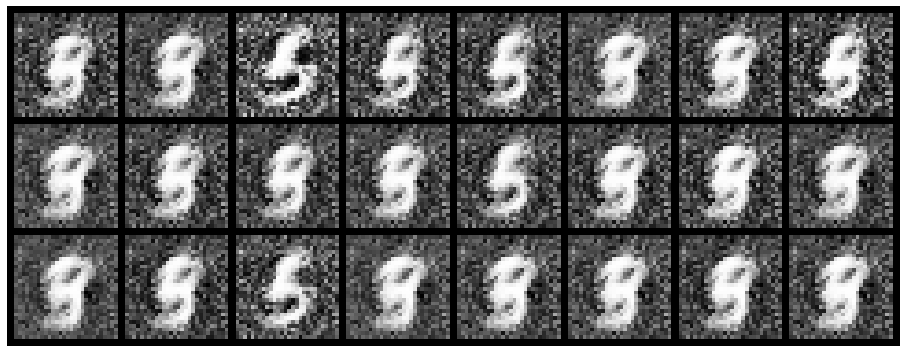

Epoch: [29/50], Batch Num: [468/469]
Discriminator Loss: 0.0122, Generator Loss: 14.9812
D(x): 0.9923, D(G(z)): 0.0006
------------------------------
29  of  50  epochs of Training finished


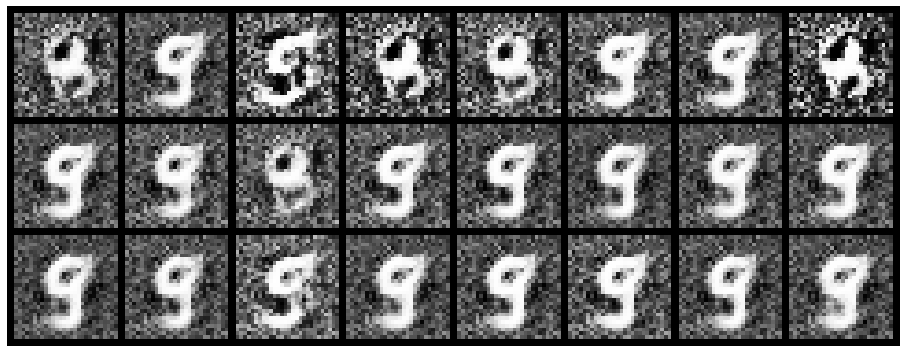

Epoch: [30/50], Batch Num: [468/469]
Discriminator Loss: 0.0011, Generator Loss: 11.3488
D(x): 1.0000, D(G(z)): 0.0010
------------------------------
30  of  50  epochs of Training finished


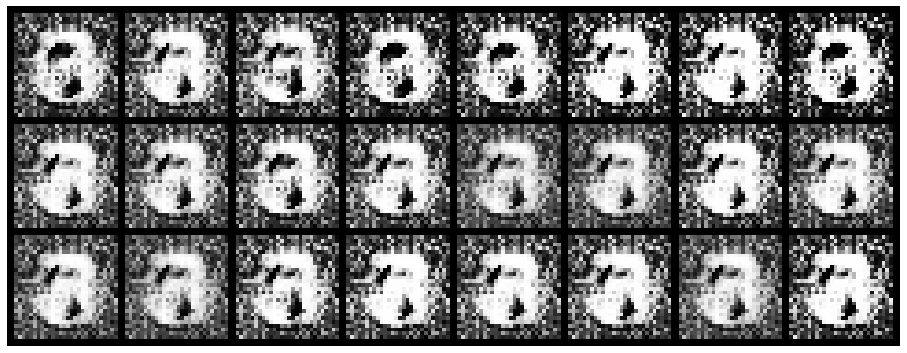

Epoch: [31/50], Batch Num: [468/469]
Discriminator Loss: 0.1831, Generator Loss: 11.1297
D(x): 0.9794, D(G(z)): 0.0407
------------------------------
31  of  50  epochs of Training finished


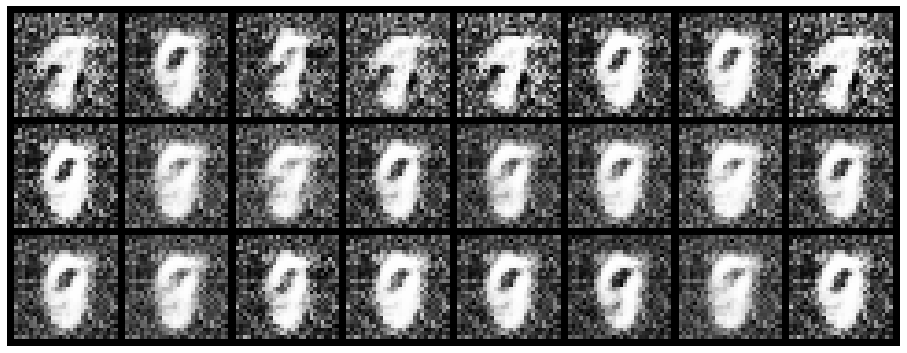

Epoch: [32/50], Batch Num: [468/469]
Discriminator Loss: 0.0061, Generator Loss: 10.5911
D(x): 0.9990, D(G(z)): 0.0047
------------------------------
32  of  50  epochs of Training finished


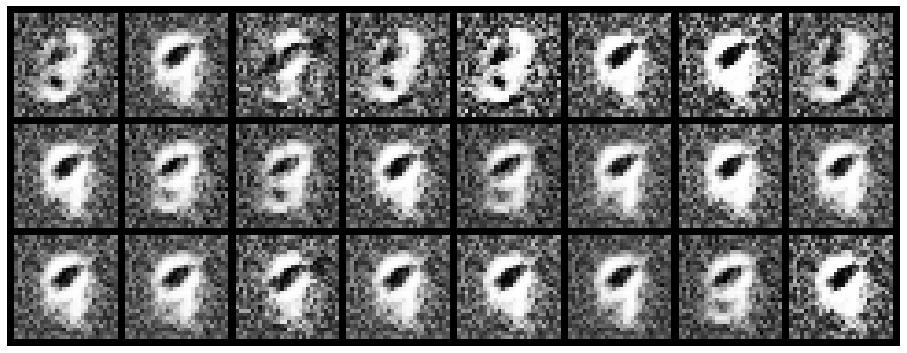

Epoch: [33/50], Batch Num: [468/469]
Discriminator Loss: 0.0084, Generator Loss: 12.6807
D(x): 0.9958, D(G(z)): 0.0028
------------------------------
33  of  50  epochs of Training finished


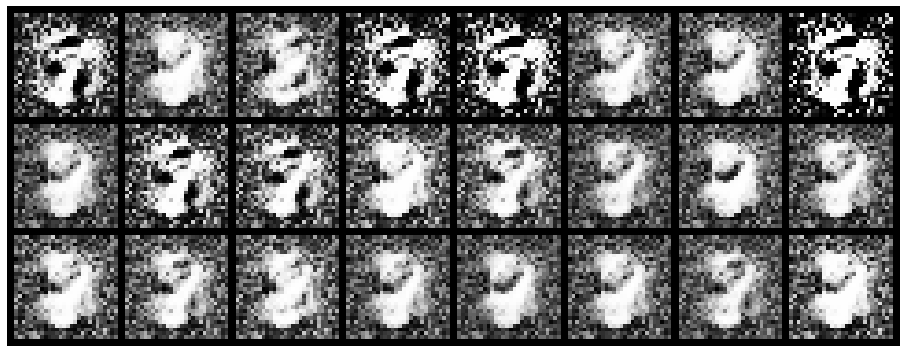

Epoch: [34/50], Batch Num: [468/469]
Discriminator Loss: 0.0488, Generator Loss: 10.0490
D(x): 0.9992, D(G(z)): 0.0265
------------------------------
34  of  50  epochs of Training finished


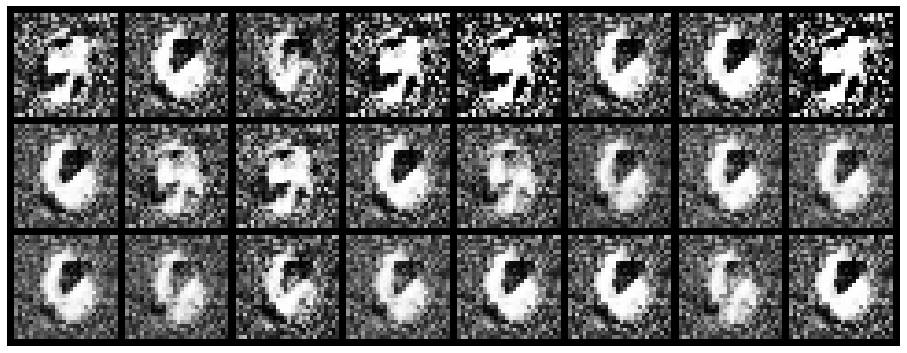

Epoch: [35/50], Batch Num: [468/469]
Discriminator Loss: 0.0116, Generator Loss: 9.7592
D(x): 0.9939, D(G(z)): 0.0024
------------------------------
35  of  50  epochs of Training finished


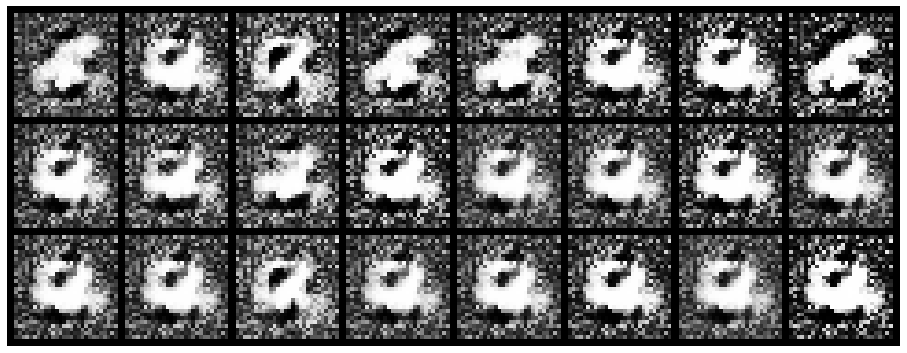

Epoch: [36/50], Batch Num: [468/469]
Discriminator Loss: 0.0009, Generator Loss: 10.7173
D(x): 1.0000, D(G(z)): 0.0009
------------------------------
36  of  50  epochs of Training finished


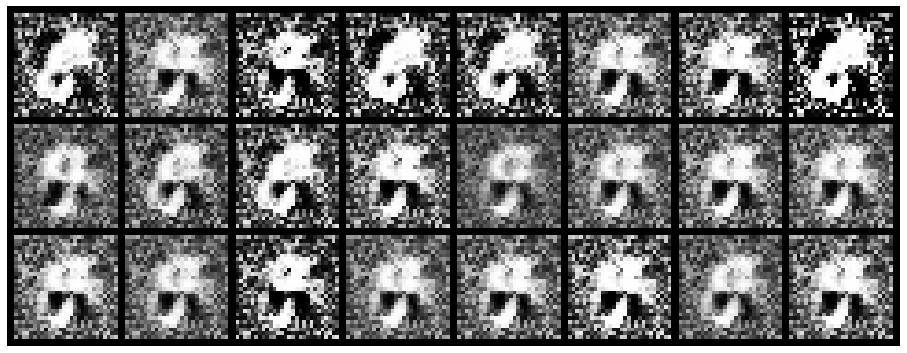

Epoch: [37/50], Batch Num: [468/469]
Discriminator Loss: 0.0273, Generator Loss: 8.9171
D(x): 0.9904, D(G(z)): 0.0006
------------------------------
37  of  50  epochs of Training finished


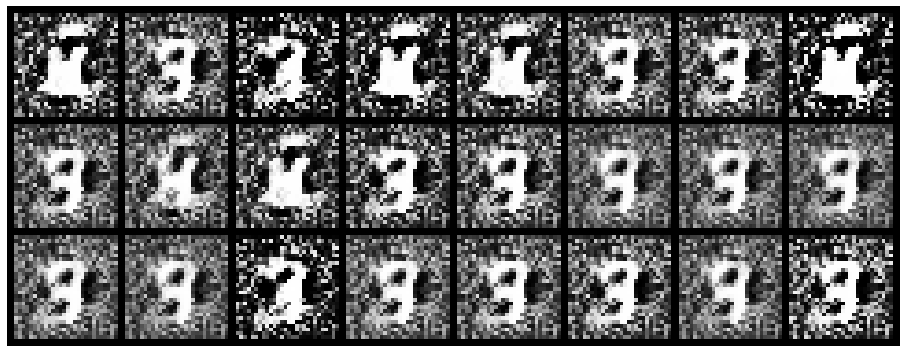

Epoch: [38/50], Batch Num: [468/469]
Discriminator Loss: 0.0009, Generator Loss: 10.7863
D(x): 1.0000, D(G(z)): 0.0009
------------------------------
38  of  50  epochs of Training finished


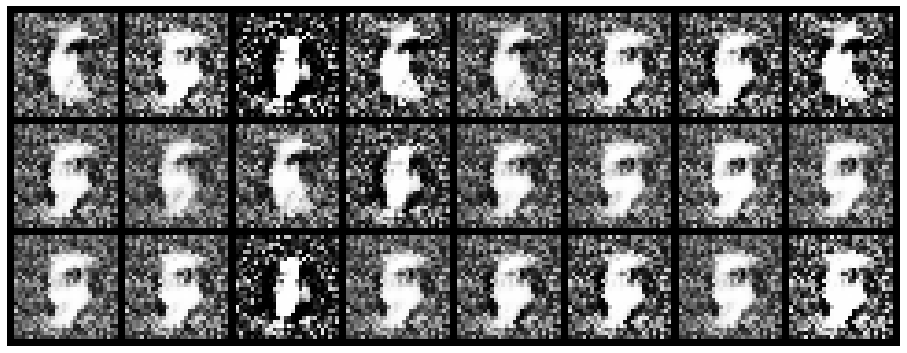

Epoch: [39/50], Batch Num: [468/469]
Discriminator Loss: 0.0005, Generator Loss: 9.9983
D(x): 1.0000, D(G(z)): 0.0005
------------------------------
39  of  50  epochs of Training finished


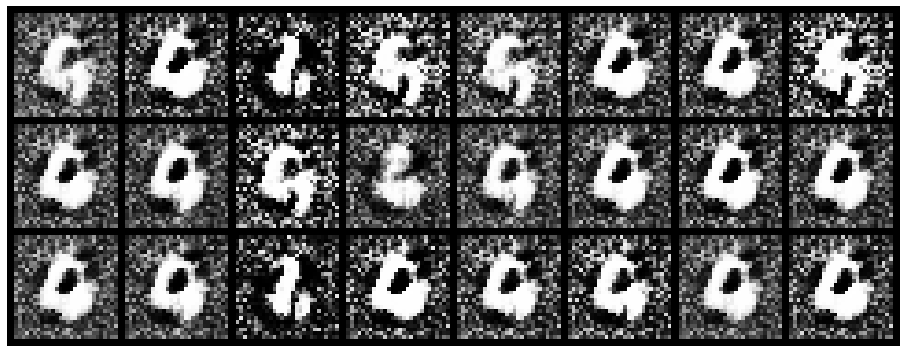

Epoch: [40/50], Batch Num: [468/469]
Discriminator Loss: 0.0026, Generator Loss: 9.3179
D(x): 1.0000, D(G(z)): 0.0025
------------------------------
40  of  50  epochs of Training finished


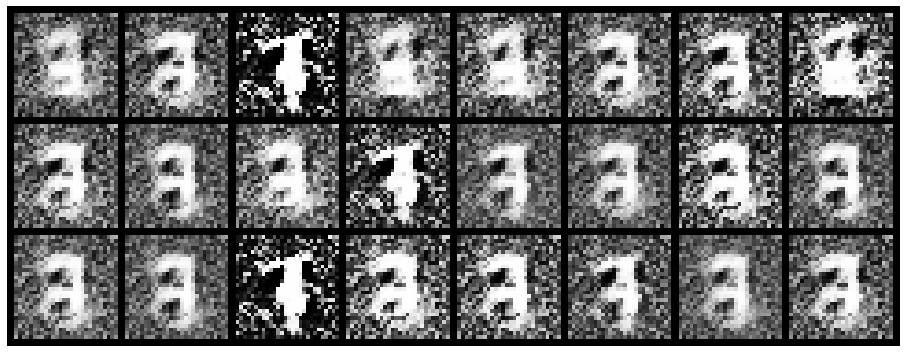

Epoch: [41/50], Batch Num: [468/469]
Discriminator Loss: 0.0112, Generator Loss: 9.9012
D(x): 0.9936, D(G(z)): 0.0012
------------------------------
41  of  50  epochs of Training finished


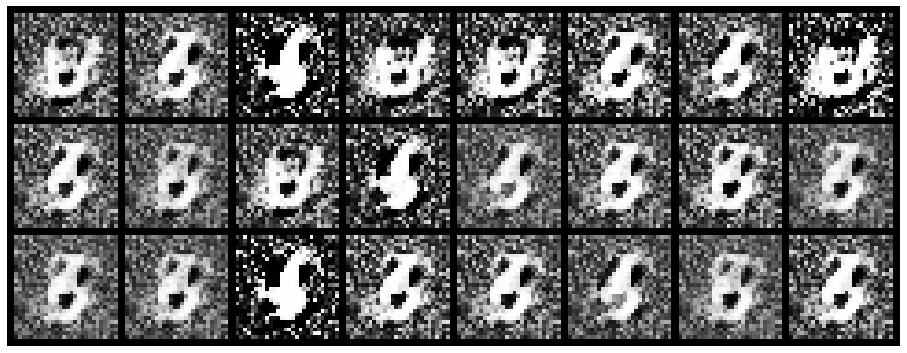

Epoch: [42/50], Batch Num: [468/469]
Discriminator Loss: 0.0109, Generator Loss: 9.1871
D(x): 0.9987, D(G(z)): 0.0088
------------------------------
42  of  50  epochs of Training finished


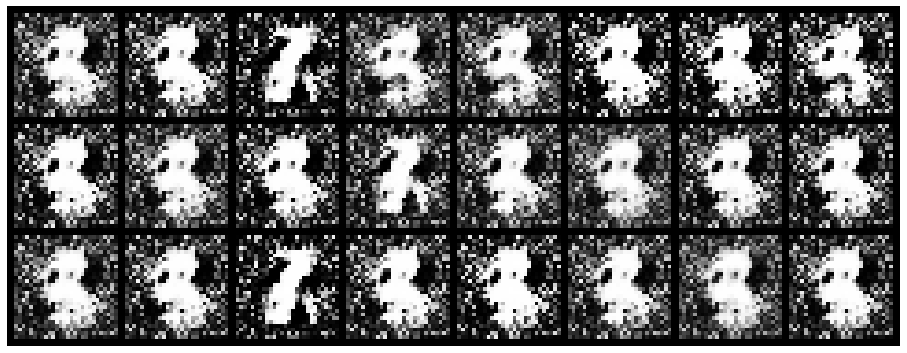

Epoch: [43/50], Batch Num: [468/469]
Discriminator Loss: 0.0732, Generator Loss: 7.6905
D(x): 1.0000, D(G(z)): 0.0145
------------------------------
43  of  50  epochs of Training finished


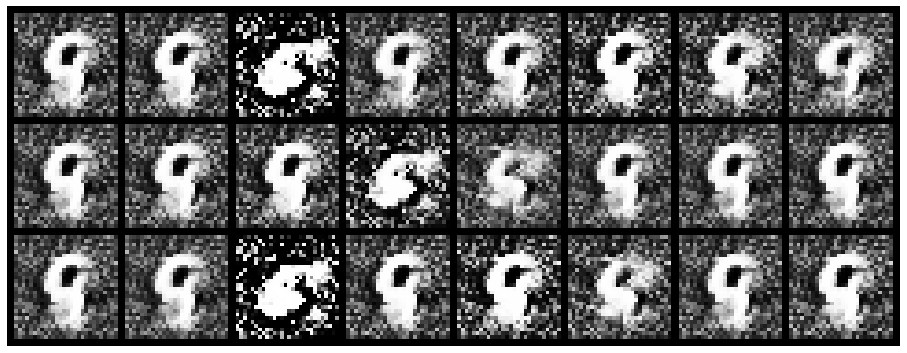

Epoch: [44/50], Batch Num: [468/469]
Discriminator Loss: 0.0475, Generator Loss: 13.6263
D(x): 0.9894, D(G(z)): 0.0024
------------------------------
44  of  50  epochs of Training finished


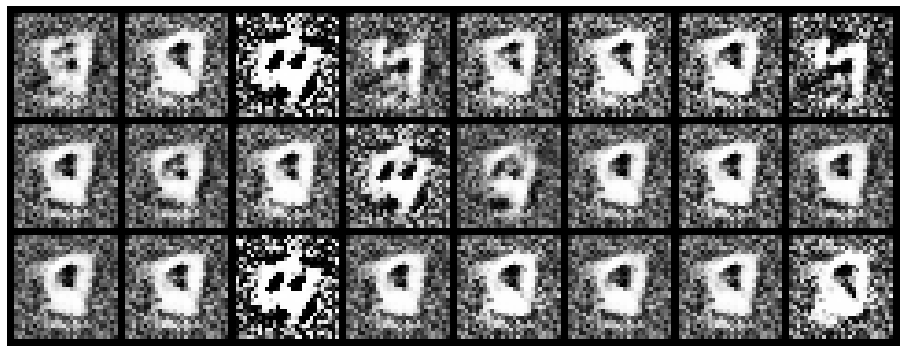

Epoch: [45/50], Batch Num: [468/469]
Discriminator Loss: 0.0020, Generator Loss: 8.3875
D(x): 1.0000, D(G(z)): 0.0020
------------------------------
45  of  50  epochs of Training finished


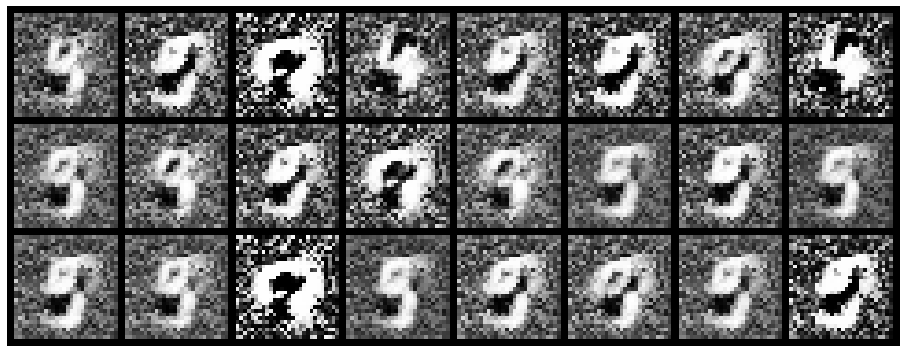

Epoch: [46/50], Batch Num: [468/469]
Discriminator Loss: 0.0359, Generator Loss: 8.9830
D(x): 0.9874, D(G(z)): 0.0083
------------------------------
46  of  50  epochs of Training finished


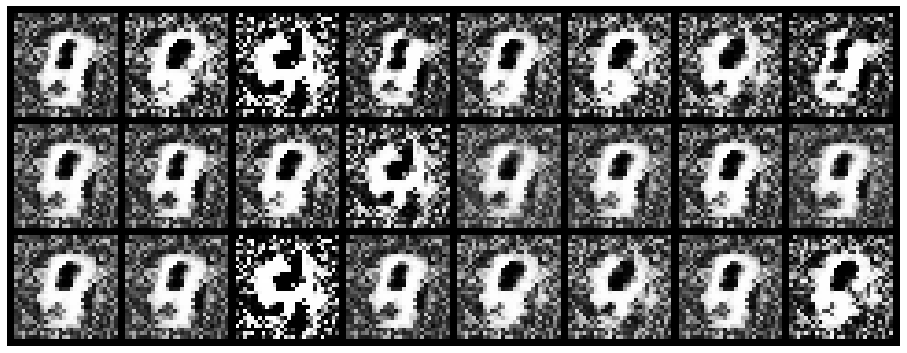

Epoch: [47/50], Batch Num: [468/469]
Discriminator Loss: 0.0081, Generator Loss: 9.8106
D(x): 0.9993, D(G(z)): 0.0057
------------------------------
47  of  50  epochs of Training finished


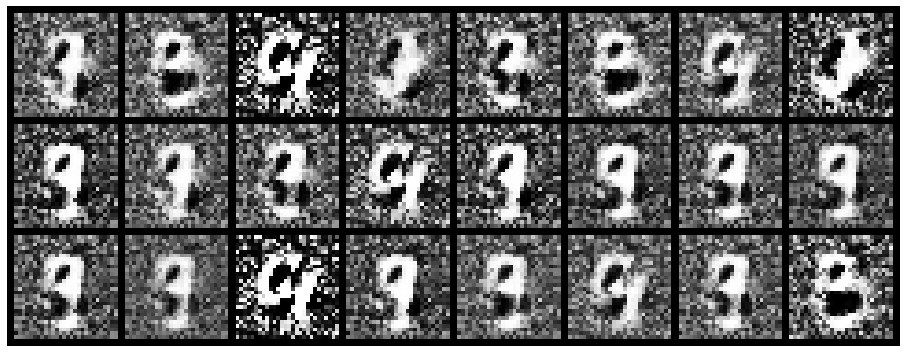

Epoch: [48/50], Batch Num: [468/469]
Discriminator Loss: 0.0126, Generator Loss: 8.3533
D(x): 0.9999, D(G(z)): 0.0100
------------------------------
48  of  50  epochs of Training finished


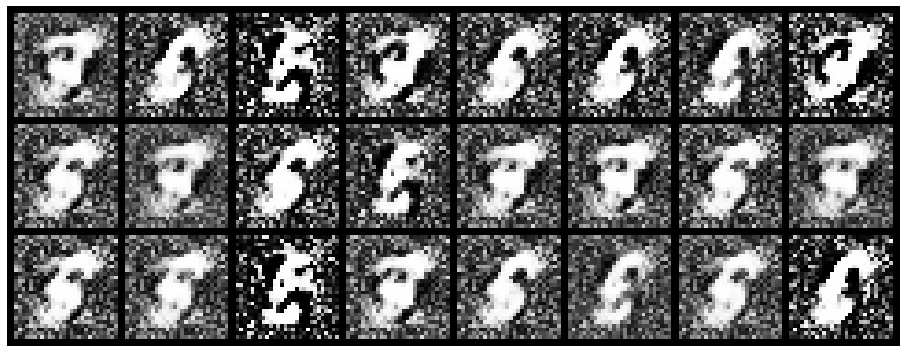

Epoch: [49/50], Batch Num: [468/469]
Discriminator Loss: 0.1388, Generator Loss: 10.3173
D(x): 0.9798, D(G(z)): 0.0149
------------------------------
49  of  50  epochs of Training finished


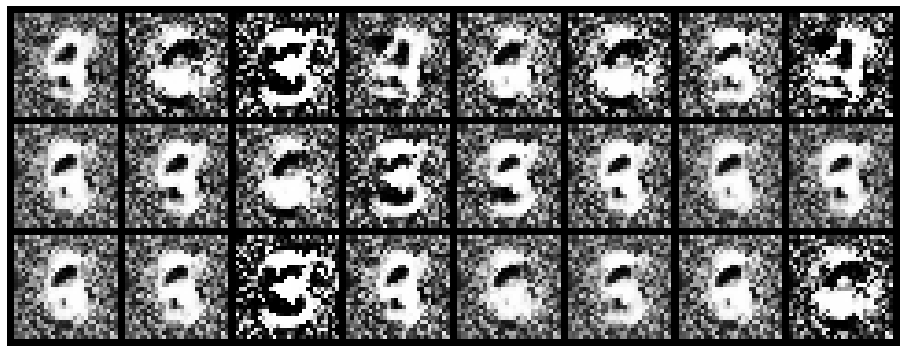

In [43]:
#train GAN
def train_discriminator(discriminator, optimizer, real_data, fake_data, loss):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()

    # Train on Real Data
    prediction_real = discriminator(real_data)
    #print("real data to be fed into discrminator",real_data.shape)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, Variable(torch.ones(N, 1)))
    error_real.backward()

    # Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, Variable(torch.zeros(N, 1)))
    error_fake.backward()

    # Update weights with gradients
    optimizer.step()

    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake


def train_generator(discriminator, optimizer, fake_data, loss):
    # Reset gradients
    N = fake_data.size(0)  
    
    # Sample noise and generate fake data
    optimizer.zero_grad()  
    
    # Calculate error and backpropagate
    prediction = discriminator(fake_data)  
    #print("fake data to be fed into discrminator while generator tr",fake_data.shape,prediction.shape)
    error = loss(prediction, Variable(torch.ones(N, 1)))
    
    # Update weights with gradients
    error.backward()  
    optimizer.step()  
    
    # Return error
    return error


def train():

    # Models, optimizers and losses
    discriminator = DiscriminatorNet()
    generator = GeneratorNet()
    loss_d = nn.BCELoss()
    loss_g = nn.BCELoss()
    d_optimizer = optim.Adam(discriminator.parameters(), 0.0002)
    g_optimizer = optim.Adam(generator.parameters(), 0.0002)

    data_loader=train_loader# load_data()
    
    num_epochs=50
    num_batches = len(data_loader)
    
    num_test_samples = 24
    test_noise = noise(num_test_samples)


    for epoch in range(num_epochs):
        for n_batch, data in enumerate(data_loader):

            (real_batch, labels) = data
            N = real_batch.size(0)

            # 1. Train Discriminator
            real_data = real_batch.view(real_batch.size(0), -1)

            # Generate fake data and detach so gradients are not calculated for generator)
            latent_space_data = noise(N)
            fake_data = generator(latent_space_data).detach()

            d_error, d_pred_real, d_pred_fake = train_discriminator(discriminator, d_optimizer, real_data,
                                                                          fake_data,
                                                                          loss_d)
            # 2. Train Generator

            # Generate fake data TO train Generator
            latent_space_data = noise(N)
            fake_data = generator(latent_space_data)
            # Train G
            g_error = train_generator(discriminator, g_optimizer, fake_data, loss_g)  # Log batch error

            
        if True:#n_batch % 50 == 0:
            print('Epoch: [{}/{}], Batch Num: [{}/{}]'.format(
                        epoch, num_epochs, n_batch, num_batches)
                )
            print('Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(d_error, g_error))
            print('D(x): {:.4f}, D(G(z)): {:.4f}'.format(d_pred_real.mean(), d_pred_fake.mean()))
            print('------------------------------')
                
              
    
        print(epoch,' of ',num_epochs, ' epochs of Training finished')
    
    #Generate images
        test_images = vectors_to_images(generator(test_noise))
        test_images = test_images.data
        log_images(test_images,test_images.size()[0])
    
train()
